<a href="https://colab.research.google.com/github/divyaprabha123/Image-processing-basics/blob/master/image_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
image = cv2.imread("/content/color_ballons.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


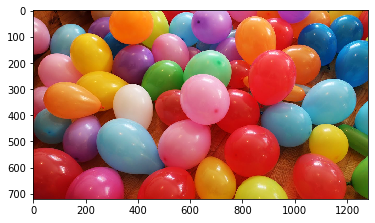

In [0]:
plt.imshow(image_rgb)

# GRAY SCALE IMAGE

RGB[A] to Gray:Y ← 0.299⋅R + 0.587⋅G + 0.114⋅B


In [0]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

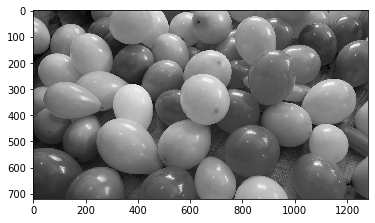

In [0]:
plt.imshow(image_gray, cmap="gray")

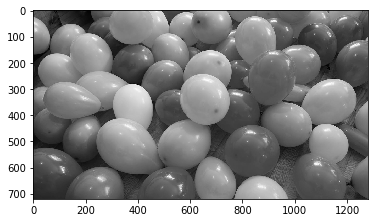

In [0]:
image_gray_temp = np.sum(image_rgb * np.array([0.299,0.587,0.114]), axis=2)
plt.imshow(image_gray_temp, cmap="gray")

# RGB image

![alt text](http://www.texample.net/media/tikz/examples/PNG/rgb-color-mixing.png)

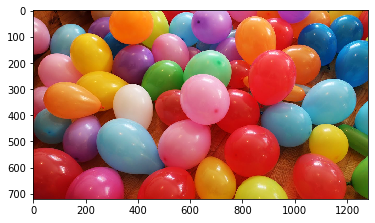

In [0]:
plt.imshow(image_rgb)

Text(0.5, 1.0, 'Green')

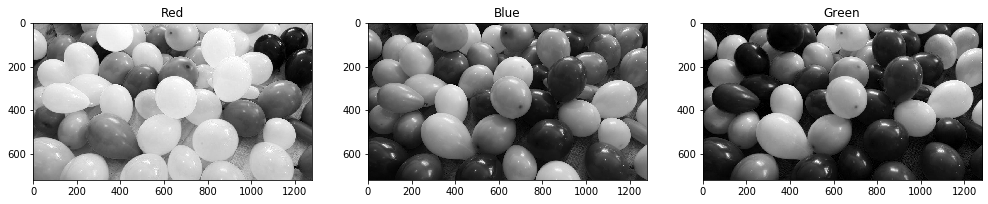

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,17))
ax1.imshow(image_rgb[:,:,0], cmap="gray")
ax1.set_title("Red")
ax2.imshow(image_rgb[:,:,1], cmap="gray")
ax2.set_title("Blue")
ax3.imshow(image_rgb[:,:,2], cmap="gray")
ax3.set_title("Green")

# Binary iamge

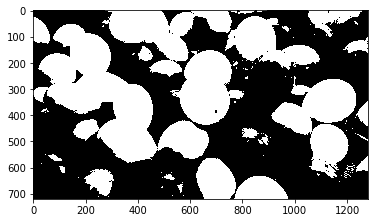

In [0]:
ret,binary = cv2.threshold(image_gray, 120,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(binary, cmap="gray")

# HSV


In [0]:
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

In [0]:
import numpy as np
np.max(image_hsv,axis=2), np.min(image_hsv[:,:,0])

(array([[218, 220, 226, ..., 210, 200, 204],
        [226, 223, 226, ..., 205, 206, 207],
        [230, 223, 220, ..., 205, 214, 207],
        ...,
        [244, 244, 241, ..., 206, 202, 207],
        [241, 241, 244, ..., 210, 196, 197],
        [241, 241, 244, ..., 255, 227, 198]], dtype=uint8), 0)

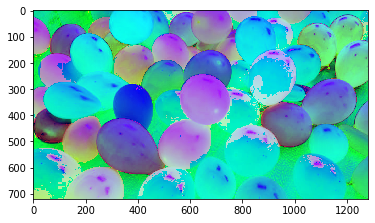

In [0]:
plt.imshow(image_hsv)

Text(0.5, 1.0, 'Value')

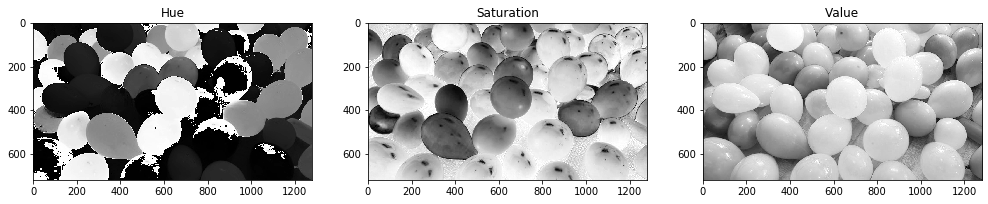

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,17))
ax1.imshow(image_hsv[:,:,0], cmap="gray")
ax1.set_title("Hue")
ax2.imshow(image_hsv[:,:,1], cmap="gray")
ax2.set_title("Saturation")
ax3.imshow(image_hsv[:,:,2], cmap="gray")
ax3.set_title("Value")

# CMY

In [0]:
RGB_SCALE = 255
CMYK_SCALE = 100

def rgb_to_cmy(l):
    r = l[0]
    g = l[1]
    b = l[2]
    if (r, g, b) == (0, 0, 0):
        # black
        return 0, 0, 0

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE
    # print(c, m, y)

    # rescale to the range [0,CMY]
    return [c, m, y]

In [0]:
image_rgb

array([[[145,  64,  21],
        [144,  63,  20],
        [142,  61,  16],
        ...,
        [210,  56,  58],
        [198,  43,  49],
        [204,  51,  56]],

       [[140,  59,  16],
        [142,  61,  18],
        [142,  61,  16],
        ...,
        [205,  51,  53],
        [206,  53,  58],
        [207,  54,  59]],

       [[141,  58,  14],
        [145,  62,  18],
        [147,  64,  20],
        ...,
        [205,  51,  53],
        [214,  61,  66],
        [207,  54,  59]],

       ...,

       [[112,   5,  11],
        [112,   5,  11],
        [113,   6,  12],
        ...,
        [ 67,  89,  17],
        [ 66,  92,  19],
        [ 63,  91,  17]],

       [[111,   6,  11],
        [111,   6,  11],
        [112,   5,  11],
        ...,
        [ 64,  74,  13],
        [ 66,  82,  19],
        [ 64,  83,  19]],

       [[111,   6,  11],
        [111,   6,  11],
        [112,   5,  11],
        ...,
        [ 40,  45,   0],
        [ 55,  64,   7],
        [ 62,  76,  17]]

In [0]:
image_cmy = np.apply_along_axis(rgb_to_cmy, 2, image_rgb)

In [0]:
plt.imshow(image_cmy)

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,17))
ax1.imshow(image_cmy[:,:,0], cmap="gray")
ax1.set_title("cyan")
ax2.imshow(image_cmy[:,:,1], cmap="gray")
ax2.set_title("magenta")
ax3.imshow(image_cmy[:,:,2], cmap="gray")
ax3.set_title("yellow")

#CMYK 

In [0]:
RGB_SCALE = 255
CMYK_SCALE = 100

def rgb_to_cmyk(l):
    r = l[0]
    g = l[1]
    b = l[2]
    if (r, g, b) == (0, 0, 0):
        # black
        return 0, 0, 0, CMYK_SCALE

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE

    # extract out k [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    # rescale to the range [0,CMYK_SCALE]
    return [c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE]

In [0]:
image_cmyk = np.apply_along_axis(rgb_to_cmyk, 2, image_rgb)

In [0]:
plt.imshow(image_cmyk)

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,17))
ax1.imshow(image_cmyk[:,:,0], cmap="gray")
ax1.set_title("cyan")
ax2.imshow(image_cmyk[:,:,1], cmap="gray")
ax2.set_title("magenta")
ax3.imshow(image_cmyk[:,:,2], cmap="gray")
ax3.set_title("yellow")


#Color thresholding

In [0]:
lower_pink = np.array([180,0,100])
upper_pink = np.array([255,255,230])

In [0]:
rgb_mask = cv2.inRange(image_rgb,lower_pink,upper_pink)

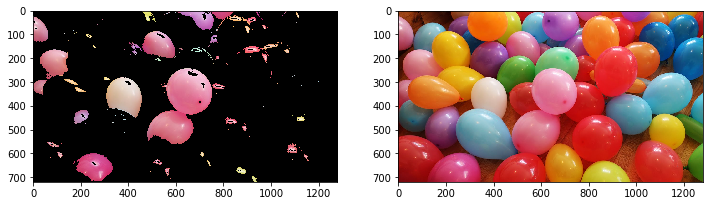

In [0]:
image_rgb_1 = image_rgb.copy()
image_rgb_1[rgb_mask == 0] = [0,0,0]
fig,(a,x) = plt.subplots(1,2,figsize=(12,12))
a.imshow(image_rgb_1)
x.imshow(image_rgb)

In [0]:
lower_hue = np.array([160,0,0])
upper_hue = np.array([180,255,255])

In [0]:
hsv_mask = cv2.inRange(image_hsv,lower_hue,upper_hue)

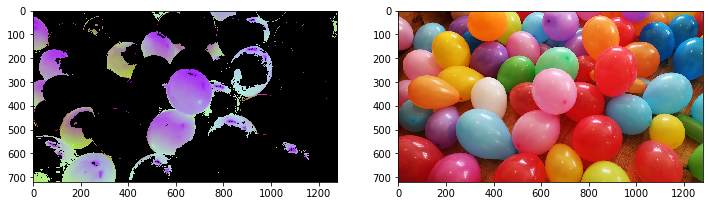

In [0]:
image_hsv_1 = image_hsv.copy()
image_hsv_1[hsv_mask == 0] = [0,0,0]
fig,(a,x) = plt.subplots(1,2,figsize=(12,12))
a.imshow(image_hsv_1)
x.imshow(image_rgb)import numpy as np
import cv2

img = cv2.imread('home.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()



## Quantization

In [0]:
import numpy as np
import cv2

img = cv2.imread("/content/color_ballons.jpg")
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



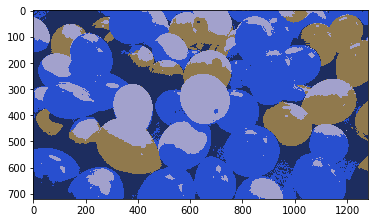

In [0]:
plt.imshow(res2)

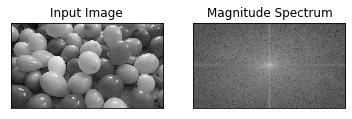

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/color_ballons.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [0]:
len(f)

720

In [0]:
amplitude = np.abs(f/921600)

In [0]:
amplitude

In [0]:
amplitude.shape

(720, 1280)

In [0]:
720 * 1280

921600

# Day night

In [0]:
!wget https://obj.umiacs.umd.edu/dnim/DNIM.tar.gz

--2020-01-30 04:29:24--  https://obj.umiacs.umd.edu/dnim/DNIM.tar.gz
Resolving obj.umiacs.umd.edu (obj.umiacs.umd.edu)... 128.8.122.11
Connecting to obj.umiacs.umd.edu (obj.umiacs.umd.edu)|128.8.122.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117915136 (112M) [binary/octet-stream]
Saving to: ‘DNIM.tar.gz’

DNIM.tar.gz         100%[===================>] 112.45M  11.2MB/s    in 8.0s    

2020-01-30 04:29:32 (14.1 MB/s) - ‘DNIM.tar.gz’ saved [117915136/117915136]



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
